In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('df_feat.csv')

#Обработка некорректных значений

In [ ]:

#отбираем строковые переменные (КАТЕГОРИАЛЬНЫЕ)
xxx = df.select_dtypes(include = 'object')
xxx.head()

'''
смотрим: client_id - не признак
dt - дата
остальные: категориальные.
Правда, среди них могут быть и бинарные признаки. Выделим их:
'''
trash = ['client_id']
dates = ['dt']
xxx_categoricals = list(set(xxx.columns) - set(trash) - set(dates))

binaries = []
categoricals = []
for fea in xxx_categoricals:
    l = len(df[fea].value_counts())
    if l == 2:
        binaries.append(fea)
    elif l <= 1:
        trash.append(fea)
    else: #больше 2 уникальных значений за исключением nan
        categoricals.append(fea)
    
#отбираем числовые переменные
xxx = df.select_dtypes(include = 'number')
xxx.head()

'''
И как следовало ожидать, остальные 284 - числовые
target - исключаем из рассмотрения
'''
xxx.drop('target', axis = 1, inplace = True)
trash.append('target')

continuous = []
for fea in xxx.columns:
    l = len(df[fea].value_counts())
    if l == 2:
        binaries.append(fea)
    elif l <= 1:
        trash.append(fea)
    elif l>2 and l<=10: #больше 2 уникальных значений, но не более 10 за исключением nan
        categoricals.append(fea)
    else:
        continuous.append(fea)

categoricals.remove('hdb_bki_total_currency')
categoricals.remove('hdb_bki_active_oth_cnt')
continuous.append('hdb_bki_total_currency')
continuous.append('hdb_bki_active_oth_cnt')


'''
НА ВЫХОДЕ:

binaries - бинарные признаки
categoricals - категориальные признаки
continuous - непрерывные признаки
dates - даты
trash - мусор
'''

#непрерывные-признаки
В основном буду смотреть на минимальное значение через describe, для выявления потенциальных отрицательных значений

In [ ]:
df_continuos = df[continuous]
df_continuos

Признаки начинающиеся с 'amount..' - сумма чего-то

In [ ]:
amount_feature = []
for i in continuous:
    if i.startswith('amount'):
        amount_feature.append(i)

In [ ]:
len(amount_feature)

84

In [ ]:
df_amount = df[amount_feature]

In [ ]:
df_amount_20 = df_amount.iloc[:,0:20]
df_amount_20.describe()

,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__perevody_s_karty_na_kartu,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__obrazovanie,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__parkovki,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__odezhda,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__kosmetika,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__gipermarkety,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__tovary_dlja_detej,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__zarubezhnye_finansovye_operatsii,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__razvlechenija,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__fastfud,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__avtomobil,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__zdorove,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__avtozapravki,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__taksi,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__supermarkety,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__elektrichki,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__set_supermarketov,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__sportivnaja_odezhda,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__aviakompanii,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__sportivnaja_odezhda
count,2.220600e+04,1.968700e+04,16749.000000,8.990000e+04,6.948300e+04,86595.000000,2.656900e+04,2.781800e+04,4.934000e+04,36779.000000,3.789800e+04,2.333200e+04,52320.000000,43137.000000,1.269820e+05,1.998200e+04,30942.000000,1.699900e+04,1.887900e+04,3.540900e+04
mean,5.683597e+04,2.806879e+04,1461.514934,5.558819e+04,1.234152e+04,6076.279749,7.286764e+03,1.148027e+05,1.370621e+04,1195.136333,1.315826e+04,1.506677e+04,5910.183597,5316.963638,1.189084e+04,6.859760e+03,9789.423910,1.116462e+04,9.489574e+04,1.629416e+04
std,2.455070e+05,1.217720e+05,4600.022863,4.204140e+05,3.712437e+04,11121.891935,2.248651e+04,3.177046e+05,7.282294e+04,4021.566670,1.307540e+05,6.665983e+04,9308.398327,12392.343199,2.804510e+04,2.410730e+04,19186.129681,3.104821e+04,2.685482e+05,4.979592e+04
min,4.500000e-01,1.000000e+00,1.000000,0.000000e+00,4.500000e-01,1.000000,1.000000e-02,5.000000e-02,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.530000,1.000000,4.600000e-01,1.000000e+00,5.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.200000e+03,1.600000e+03,150.000000,2.895000e+03,1.000000e+03,859.935000,1.131000e+03,5.606000e+03,9.600000e+02,397.000000,1.000000e+03,1.670000e+03,1561.875000,700.000000,1.536130e+03,3.000000e+02,730.000000,1.199000e+03,9.447000e+03,1.565000e+03
50%,1.280000e+04,5.675000e+03,424.000000,8.769530e+03,3.255920e+03,2659.840000,2.767900e+03,2.926000e+04,3.286390e+03,762.000000,2.776905e+03,3.984145e+03,3465.905000,1954.000000,4.939940e+03,1.345600e+03,2586.050000,3.580000e+03,2.563600e+04,4.977000e+03
75%,4.900975e+04,1.949200e+04,1350.000000,2.647700e+04,1.015324e+04,7081.305000,6.612400e+03,1.000000e+05,1.068000e+04,1460.000000,7.197390e+03,1.041700e+04,7177.780000,5237.000000,1.327247e+04,5.841225e+03,9572.945000,9.839000e+03,7.403700e+04,1.399900e+04
max,2.139738e+07,6.206576e+06,309064.621500,4.588285e+07,1.771270e+06,704142.180000,1.074499e+06,1.116832e+07,9.367654e+06,728792.000000,1.050000e+07,4.306900e+06,668452.820000,621266.445400,3.046475e+06,1.829055e+06,351910.910000,1.657693e+06,1.230703e+07,2.925833e+06


In [ ]:
df_amount_20_40 = df_amount.iloc[:,20:40]
df_amount_20_40.describe()

,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__cotovaja_svjaz,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__kino,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__oteli,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__kafe,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__set_supermarketov,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__meditsinskie_tsentry,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__elektronnye_dengi,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__tsvety,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__avtozapravki,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__kofejni,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__transport,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__gipermarkety,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__marketplejsy,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__zdorove,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__perevody_s_karty_na_kartu,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__supermarkety,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__kosmetika,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__bary_i_paby,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__zarubezhnye_finansovye_operatsii,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__hobbi
count,23779.000000,1.766500e+04,2.565100e+04,1.226880e+05,21207.000000,3.354300e+04,6.580700e+04,2.022900e+04,7.345000e+04,19454.000000,6.993700e+04,1.163420e+05,2.299100e+04,4.480200e+04,3.406900e+04,1.000660e+05,4.150300e+04,20382.000000,1.784500e+04,2.733000e+04
mean,2860.174845,2.994987e+03,7.843839e+04,3.224421e+04,4792.477941,2.182575e+04,6.625468e+04,4.363186e+03,1.250392e+04,2911.472580,2.586262e+03,1.365349e+04,1.704238e+04,2.232534e+04,1.110680e+05,5.028855e+03,7.055056e+03,4856.074730,5.962191e+04,3.362518e+03
std,12590.287922,4.036784e+04,5.352437e+05,1.197251e+05,7814.129444,1.349487e+05,2.449285e+05,2.219071e+04,2.136397e+04,9976.356784,2.439239e+04,2.598428e+04,2.848611e+05,9.348774e+04,4.228304e+05,1.256885e+04,2.237304e+04,12895.714942,1.609986e+05,2.013178e+04
min,1.000000,1.000000e+00,0.000000e+00,5.000000e-01,3.000000,1.000000e+00,1.000000e-02,1.000000e+00,6.200000e-01,1.000000,1.000000e+00,1.000000e+00,7.600000e-01,0.000000e+00,2.700000e-01,6.000000e-01,0.000000e+00,1.000000,1.000000e+00,0.000000e+00
25%,450.000000,5.600000e+02,3.000000e+03,1.604000e+03,603.230000,1.800500e+03,3.058500e+03,8.200000e+02,2.000000e+03,414.166200,1.840000e+02,1.583793e+03,1.123925e+03,1.940000e+03,6.550000e+03,7.971225e+02,7.153250e+02,560.500000,3.600000e+03,3.500000e+02
50%,898.000000,1.000000e+03,1.117000e+04,6.503000e+03,1827.160000,4.561520e+03,1.240000e+04,1.850000e+03,6.072830e+03,942.871150,6.840000e+02,5.394370e+03,3.264000e+03,5.200000e+03,2.751000e+04,2.281595e+03,2.099000e+03,1600.000000,1.500000e+04,9.425000e+02
75%,1900.000000,1.930000e+03,3.964714e+04,2.405194e+04,5402.395000,1.291550e+04,4.724253e+04,3.900000e+03,1.554274e+04,2357.001525,2.160000e+03,1.547893e+04,1.003132e+04,1.534575e+04,9.346699e+04,5.664177e+03,6.070000e+03,4540.000000,5.270000e+04,2.430000e+03
max,942552.000000,5.000000e+06,4.721261e+07,1.236606e+07,111916.990000,1.175318e+07,3.524191e+07,1.325426e+06,1.538586e+06,547515.000000,3.920249e+06,1.614121e+06,3.749209e+07,7.766030e+06,4.384208e+07,1.513210e+06,1.258850e+06,591965.000000,4.500000e+06,1.488374e+06


In [ ]:
df_amount_40_60 = df_amount.iloc[:,40:60]
df_amount_40_60.describe()

,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__obsluzhivanie_kompjuterov,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__avtozapchasti,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__alkogol,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__avtomobil,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__bytovaja_tehnika,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__odezhda,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__alkogol,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__hobbi,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__tovary_i_uslugi,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__produkty,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__kafe_pekarni,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__pokupka_odezhdy_onlajn,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__produkty,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__kafe,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__tovary_i_uslugi,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__razvlechenija,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__torgovye_tsentry,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__zoomagaziny,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__dom_kvartira,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__apteki
count,2.896800e+04,2.028200e+04,5.920900e+04,6.217000e+04,2.346000e+04,5.383800e+04,8.729100e+04,5.077300e+04,8.614000e+04,1.375580e+05,26850.000000,2.502800e+04,1.142420e+05,9.792200e+04,6.123900e+04,2.782900e+04,2.234500e+04,17382.000000,7.113600e+04,1.088080e+05
mean,6.058480e+03,1.075662e+04,3.722418e+03,2.421190e+04,3.351858e+04,3.091025e+04,7.638328e+03,5.416667e+03,2.142949e+04,2.576032e+04,1071.012324,1.914687e+04,1.030015e+04,1.369569e+04,9.897090e+03,8.454444e+03,1.332609e+04,2632.885046,2.027518e+04,8.606111e+03
std,7.830036e+04,5.435025e+04,1.503871e+04,1.900251e+05,1.176910e+05,2.270472e+05,4.362396e+04,3.067524e+04,5.502126e+05,9.198344e+04,2390.251599,7.893254e+04,3.848316e+04,4.798332e+04,2.358208e+05,6.107885e+04,6.332697e+04,6503.739777,1.045350e+05,3.105743e+05
min,7.800000e-01,1.000000e+00,1.000000e+00,5.800000e-01,1.000000e+00,1.000000e+00,8.000000e-01,0.000000e+00,7.292000e-01,3.000000e-01,1.000000,1.000000e+00,3.000000e-01,1.000000e+00,7.292000e-01,1.000000e+00,1.000000e+00,0.500000,1.000000e+00,1.000000e+00
25%,5.000000e+02,7.000000e+02,4.874200e+02,1.496905e+03,1.999000e+03,1.804000e+03,7.400100e+02,4.500000e+02,7.139025e+02,2.870142e+03,174.000000,2.325000e+03,1.369023e+03,9.340000e+02,3.394309e+02,6.880000e+02,4.476200e+02,438.530000,5.479500e+02,8.597875e+02
50%,1.253000e+03,2.274000e+03,1.382610e+03,4.682535e+03,7.198000e+03,5.332000e+03,2.419280e+03,1.360000e+03,2.656000e+03,9.525390e+03,419.000000,6.637750e+03,4.083210e+03,3.239425e+03,1.190000e+03,2.100000e+03,1.610000e+03,1150.000000,1.999000e+03,2.608260e+03
75%,3.040250e+03,7.454500e+03,3.673300e+03,1.470063e+04,2.834625e+04,1.558500e+04,7.304975e+03,3.895000e+03,9.710000e+03,2.615592e+04,1061.000000,1.801750e+04,1.045776e+04,1.069435e+04,4.349000e+03,6.584000e+03,6.391000e+03,2726.625000,8.338083e+03,7.081532e+03
max,8.285747e+06,3.368690e+06,1.210727e+06,1.466160e+07,8.137325e+06,2.365562e+07,1.007417e+07,2.139869e+06,8.069622e+07,1.354195e+07,130926.790000,6.688936e+06,7.445794e+06,3.953495e+06,2.804498e+07,9.232267e+06,2.891015e+06,293982.800000,6.826473e+06,8.214334e+07


In [ ]:
df_amount_60_84 = df_amount.iloc[:,60:85]
df_amount_60_84.describe()

,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__transport,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__knigi,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__remont,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__meditsinskie_tsentry,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__remont,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__vse_dlja_doma,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__obsluzhivanie_kompjuterov,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__kommunalnye_uslugi,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__dom_kvartira,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__parkovki,...,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__tsvety,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__puteshestvija,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__cotovaja_svjaz,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__vse_dlja_doma,amount_by_category_30d__summarur_amt__SUM__cashflowcategory_name__vydacha_nalichnyh_v_bankomate,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__vydacha_nalichnyh_v_bankomate,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__kommunalnye_uslugi,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__zoomagaziny,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__taksi,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__detskaja_odezhda
count,46042.000000,1.752900e+04,5.422300e+04,1.670300e+04,2.705100e+04,6.743400e+04,1.720500e+04,2.297200e+04,3.859500e+04,2.771600e+04,...,4.170400e+04,2.381000e+04,41063.000000,3.690300e+04,9.593400e+04,1.326190e+05,3.506500e+04,3.210600e+04,5.756200e+04,1.660700e+04
mean,1309.052370,3.129402e+03,2.325260e+04,1.483760e+04,1.547492e+04,1.367156e+04,3.310131e+03,1.010377e+04,1.224817e+04,2.646405e+03,...,6.026075e+03,7.074829e+04,5195.413157,8.384995e+03,2.618022e+05,5.407263e+05,1.968307e+04,4.384777e+03,1.165138e+04,9.966678e+03
std,8635.246386,2.180538e+04,1.117712e+05,7.582980e+04,6.662866e+04,7.523082e+04,2.996506e+04,2.524321e+04,6.734576e+04,1.121125e+04,...,3.445768e+04,3.541492e+05,18532.429797,7.668753e+04,1.569550e+06,2.508345e+06,5.091364e+04,1.651384e+04,2.966757e+04,3.598736e+04
min,1.000000,1.000000e+00,6.000000e-02,1.000000e+00,6.000000e-02,5.000000e-01,7.800000e-01,1.000000e+00,0.000000e+00,1.000000e+00,...,1.000000e+00,5.000000e-01,1.000000,1.000000e+00,1.701420e+01,0.000000e+00,7.600000e-01,1.000000e+00,1.000000e+00,1.000000e+00
25%,116.000000,2.500000e+02,8.110500e+02,1.600000e+03,5.655800e+02,6.900000e+02,3.000000e+02,1.620797e+03,3.554200e+02,2.000000e+02,...,9.100000e+02,3.804250e+03,590.000000,4.509400e+02,1.110000e+04,2.770000e+04,2.700000e+03,5.307750e+02,1.182338e+03,1.000000e+03
50%,396.000000,7.490000e+02,3.116000e+03,3.582000e+03,1.972000e+03,2.374150e+03,7.300000e+02,4.819965e+03,1.181000e+03,6.000000e+02,...,2.173500e+03,1.395100e+04,1500.000000,1.406000e+03,4.340000e+04,9.650000e+04,8.803180e+03,1.635000e+03,3.746450e+03,2.839000e+03
75%,1046.000000,2.048000e+03,1.375000e+04,8.910000e+03,8.033500e+03,9.030525e+03,1.628250e+03,1.033337e+04,4.750000e+03,2.180000e+03,...,5.077250e+03,4.724875e+04,3625.000000,5.085150e+03,1.501494e+05,3.334000e+05,2.143727e+04,4.453875e+03,1.100978e+04,8.073500e+03
max,728384.000000,1.805279e+06,9.369276e+06,3.377617e+06,3.536221e+06,1.339162e+07,2.231577e+06,1.340405e+06,4.935089e+06,1.023429e+06,...,3.389301e+06,3.070751e+07,943052.000000,1.338114e+07,2.507008e+08,3.004443e+08,3.887097e+06,2.085870e+06,2.034735e+06,1.442154e+06


Признаки начинающиеся с 'hdb..'

In [ ]:
hdb_feature = []
for i in continuous:
    if i.startswith('hdb'):
        hdb_feature.append(i)
df_hdb = df[hdb_feature]

In [ ]:
len(hdb_feature)

43

In [ ]:
df_hdb_20 = df_hdb.iloc[:,0:20]
df_hdb_20.describe()

,hdb_outstand_sum,hdb_bki_last_product_days,hdb_other_active_credits_count,hdb_bki_total_pil_last_days,hdb_bki_total_ip_cnt,hdb_bki_total_auto_last_days,hdb_bki_active_max_limit,hdb_bki_other_active_pil_month_payments_sum,hdb_bki_total_ip_last_days,hdb_bki_total_active_products,hdb_bki_total_pil_max_limit,hdb_other_active_min_psk,hdb_bki_active_cc_max_outstand,hdb_bki_active_ip_cnt,hdb_bki_active_ip_max_limit,hdb_bki_total_max_limit,hdb_bki_total_ip_max_limit,hdb_bki_active_ip_max_outstand,hdb_bki_total_oth_cnt,hdb_bki_active_pil_max_limit
count,1.931580e+05,193250.000000,193250.000000,161011.000000,193250.000000,41713.000000,1.762570e+05,3.861700e+04,60900.000000,193250.000000,1.610110e+05,191546.000000,1.567410e+05,193250.000000,4.190900e+04,1.932400e+05,6.090000e+04,4.142300e+04,193250.000000,9.756800e+04
mean,1.416849e+06,653.309858,3.427457,1019.612337,0.496916,2241.902045,1.458686e+06,2.108626e+04,1576.485632,5.345878,8.748898e+05,0.681321,8.730100e+04,0.267959,3.875333e+06,1.919771e+06,3.701542e+06,3.032057e+06,0.068719,7.730622e+05
std,7.371924e+06,868.538163,3.962060,1203.067229,0.955159,1554.917613,6.174491e+06,6.644309e+05,1329.620161,4.732978,6.232975e+06,15.423857,1.613882e+05,0.586275,7.476574e+06,2.588547e+07,7.620352e+06,7.107881e+06,0.425862,3.120641e+06
min,0.000000e+00,2.000000,0.000000,3.000000,0.000000,4.000000,0.000000e+00,0.000000e+00,4.000000,0.000000,0.000000e+00,-3569.700000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.681000e+03,0.000000e+00,0.000000,0.000000e+00
25%,1.669575e+04,139.000000,1.000000,221.000000,0.000000,872.000000,1.500000e+05,2.810000e+03,528.000000,2.000000,1.006421e+05,0.000000,3.109900e+02,0.000000,1.514753e+06,2.000000e+05,1.400000e+06,9.037740e+05,0.000000,1.212715e+05
50%,3.005210e+05,323.000000,2.000000,539.000000,0.000000,1981.000000,4.565000e+05,6.788000e+03,1181.000000,4.000000,3.145000e+05,0.000000,4.342638e+04,0.000000,2.400000e+06,6.200000e+05,2.282000e+06,1.804730e+06,0.000000,3.500000e+05
75%,1.308171e+06,780.000000,5.000000,1295.000000,1.000000,3387.000000,1.500000e+06,1.450100e+04,2354.000000,8.000000,7.660000e+05,0.000000,1.070450e+05,0.000000,4.100000e+06,1.806000e+06,3.925000e+06,3.304419e+06,0.000000,8.225000e+05
max,1.904713e+09,7586.000000,126.000000,7102.000000,57.000000,6362.000000,1.000000e+09,1.263002e+08,6825.000000,139.000000,9.710000e+08,2002.000000,8.537880e+06,19.000000,3.870708e+08,1.000000e+10,6.344480e+08,5.154609e+08,29.000000,3.500000e+08


ПСК - Полная стоимость кредита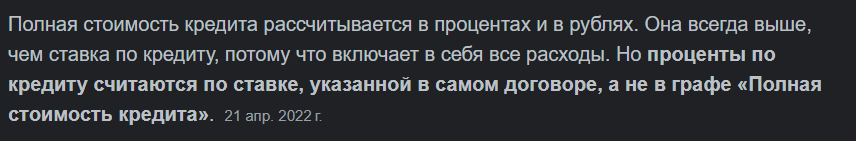

То есть пкс вышла отрицательной, что странно

In [ ]:
print(df_hdb_20.loc[df_hdb_20['hdb_other_active_min_psk'] < 0]['hdb_other_active_min_psk'])
print('\nкол-во',df_hdb_20.loc[df_hdb_20['hdb_other_active_min_psk'] < 0]['hdb_other_active_min_psk'].count())

6233      -615.466
7568      -594.000
13223     -244.990
22414    -3569.700
44070     -321.919
48150     -615.466
72120    -1274.000
82282     -594.000
93784     -361.000
115249    -244.990
169963    -594.000
Name: hdb_other_active_min_psk, dtype: float64

кол-во 11


In [ ]:
incorrect_index_min_psk = df_hdb_20.loc[df_hdb_20['hdb_other_active_min_psk'] < 0].index
incorrect_index_min_psk

Int64Index([6233, 7568, 13223, 22414, 44070, 48150, 72120, 82282, 93784,
            115249, 169963],
           dtype='int64')

In [ ]:
df_hdb_20_40 = df_hdb.iloc[:,20:40]
df_hdb_20_40.describe()

,hdb_other_active_mean_psk,hdb_bki_total_auto_cnt,hdb_other_month_payments_sum,hdb_bki_total_cc_cnt,hdb_bki_total_auto_max_limit,hdb_bki_active_cc_max_limit,hdb_other_credits_count,hdb_bki_total_cc_last_days,hdb_bki_active_pil_cnt,hdb_bki_active_auto_cnt,hdb_bki_total_pil_cnt,hdb_bki_other_active_ip_outstanding,hdb_bki_other_active_pil_outstanding,hdb_bki_total_cnt,hdb_bki_other_active_cc_month_payments_sum,hdb_bki_total_cc_max_limit,hdb_bki_other_active_ip_month_payments_sum,hdb_bki_active_pil_max_outstand,hdb_bki_active_cc_cnt,hdb_bki_total_products
count,191546.000000,193250.000000,7.692400e+04,193250.000000,4.171300e+04,1.571910e+05,193250.000000,176029.000000,193250.000000,193250.000000,193250.000000,3.756600e+04,7.704400e+04,211190.000000,24786.000000,1.760290e+05,2.263700e+04,9.689500e+04,193250.000000,214952.000000
mean,8.627030,0.415736,2.275748e+04,5.293418,9.846747e+05,2.559249e+05,9.935358,994.819348,1.002758,0.084755,5.621211,3.193226e+06,5.547326e+05,52.965519,1611.974405,2.576399e+05,2.683632e+04,5.491907e+05,3.568621,9.046843
std,39.559780,1.023459,4.895574e+05,4.591991,1.347992e+06,3.957870e+05,10.150564,1055.671284,1.428202,0.385513,5.540831,8.748739e+06,3.451343e+06,41.978177,12460.248705,4.511666e+05,7.837618e+04,2.522041e+06,3.550363,11.717799
min,-322.309325,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,2.000000,4.077770e+05,7.000000e+04,3.000000,241.000000,0.000000,0.000000,1.000000,8.499340e+05,4.131487e+04,23.000000,0.000000,6.800000e+04,9.851000e+03,6.100512e+04,1.000000,3.000000
50%,3.105374,0.000000,7.966500e+03,4.000000,6.722900e+05,1.500000e+05,7.000000,617.000000,1.000000,0.000000,4.000000,1.777829e+06,1.800000e+05,44.000000,0.000000,1.500000e+05,1.728000e+04,2.209410e+05,3.000000,7.000000
75%,6.931985,0.000000,2.112725e+04,8.000000,1.171934e+06,3.082000e+05,14.000000,1321.000000,2.000000,0.000000,9.000000,3.335804e+06,5.164752e+05,72.000000,0.000000,3.100000e+05,2.860600e+04,5.638184e+05,5.000000,12.000000
max,4214.000000,24.000000,1.263002e+08,66.000000,1.815730e+08,7.000000e+07,448.000000,7878.000000,29.000000,14.000000,71.000000,7.276776e+08,5.410685e+08,668.000000,665336.000000,7.000000e+07,5.875676e+06,3.000000e+08,64.000000,642.000000


In [ ]:
print(df_hdb_20_40.loc[df_hdb_20_40['hdb_other_active_mean_psk'] < 0]['hdb_other_active_mean_psk'])
print('\nкол-во',df_hdb_20_40.loc[df_hdb_20_40['hdb_other_active_mean_psk'] < 0]['hdb_other_active_mean_psk'].count())

7568     -64.901111
22414   -322.309325
48150     -5.906180
82282   -198.000000
Name: hdb_other_active_mean_psk, dtype: float64

кол-во 4


In [ ]:
incorrect_index_mean_psk = df_hdb_20_40.loc[df_hdb_20_40['hdb_other_active_mean_psk'] < 0].index
incorrect_index_mean_psk

Признаки начинающиеся с 'transaction..' - сумма чего-то

In [ ]:
trans_feature = []
for i in continuous:
    if i.startswith('transaction'):
        trans_feature.append(i)
df_trans = df[trans_feature]
len(trans_feature)

108

In [ ]:
df_tr_20 = df_trans.iloc[:,0:20]
df_tr_20.describe()

,transaction_category_entertainment_sum_amt_m2,transaction_category_general_store_percent_amt_2m,transaction_category_money_send_percent_cnt_2m,transaction_category_hotels_inc_amt_2m,transaction_category_cash_sum_cnt_m2,transaction_category_money_send_sum_cnt_m2,transaction_category_bank_online_percent_amt_2m,transaction_category_auto_services_percent_cnt_2m,transaction_category_fastfood_sum_cnt_m2,transaction_category_other_retail_purchase_inc_cnt_2m,transaction_category_other_retail_purchase_inc_amt_2m,transaction_category_supermarket_percent_amt_2m,transaction_category_transport_inc_amt_2m,transaction_category_fuel_percent_cnt_2m,transaction_category_entertainment_inc_cnt_2m,transaction_category_auto_services_inc_cnt_2m,transaction_category_fastfood_inc_cnt_2m,transaction_category_clothers_shoes_inc_amt_2m,transaction_category_airplane_tickets_percent_cnt_2m,transaction_category_bank_online_percent_cnt_2m
count,4.464300e+04,6.471700e+04,68459.000000,20905.000000,119819.000000,68459.000000,62284.000000,43487.000000,113802.000000,117474.000000,117108.000000,140514.000000,89856.000000,77727.000000,44955.000000,43487.000000,113802.000000,83940.000000,19192.000000,62735.000000
mean,1.379144e+04,1.786869e-02,0.161696,2.724235,6.107904,7.763727,0.025578,0.033027,18.561062,1.521409,1.532030,0.175136,1.754369,0.064658,2.364281,2.126226,1.594022,1.756317,0.026234,0.027971
std,7.239975e+04,4.766460e-02,0.251116,2.245744,9.341391,16.789915,0.055270,0.056842,25.228130,1.295510,1.551890,0.183565,1.609136,0.075096,1.858454,1.728076,1.346464,1.676341,0.062184,0.040468
min,0.000000e+00,2.412747e-07,0.000433,0.000000,1.000000,1.000000,0.000002,0.000499,1.000000,0.002133,0.000012,0.000003,0.000011,0.000654,0.006023,0.023763,0.010470,0.000000,0.000683,0.000755
25%,9.500000e+02,1.702503e-03,0.018717,0.676266,2.000000,2.000000,0.003301,0.008547,3.000000,0.715686,0.427874,0.043194,0.657821,0.021505,0.912500,0.869048,0.758813,0.528644,0.005988,0.009346
50%,3.290220e+03,5.474058e-03,0.054545,2.027988,4.000000,3.000000,0.009668,0.016949,9.000000,1.133333,0.994920,0.113857,1.216667,0.042857,1.738095,1.520833,1.186626,1.184357,0.011494,0.017413
75%,1.065000e+04,1.608833e-02,0.166667,5.141398,7.000000,8.000000,0.025907,0.035390,24.000000,1.812057,2.046613,0.244738,2.222599,0.080645,3.041667,3.041667,1.921053,2.385283,0.023585,0.032468
max,9.822644e+06,1.000000e+00,1.000000,6.083333,1262.000000,1153.000000,1.000000,1.000000,1229.000000,6.083333,6.083333,1.000000,6.083333,1.000000,6.083333,6.083333,6.083333,6.083333,1.000000,1.000000


In [ ]:
df_tr_20_40 = df_trans.iloc[:,20:40]
df_tr_20_40.describe()

,transaction_category_house_repair_inc_amt_2m,transaction_category_cash_inc_amt_2m,transaction_category_house_repair_sum_amt_m2,transaction_category_general_store_sum_amt_m2,transaction_category_money_send_percent_amt_2m,transaction_category_other_retail_purchase_sum_cnt_m2,transaction_category_airplane_tickets_inc_amt_2m,transaction_category_sporting_goods_sum_cnt_m2,transaction_category_airplane_tickets_sum_cnt_m2,transaction_category_cash_sum_amt_m2,transaction_category_hotels_percent_amt_2m,transaction_category_fuel_inc_cnt_2m,transaction_category_fastfood_inc_amt_2m,transaction_category_restaurants_percent_cnt_2m,transaction_category_clothers_shoes_inc_cnt_2m,transaction_category_other_retail_purchase_percent_cnt_2m,transaction_category_pharmacy_sum_amt_m2,transaction_category_pharmacy_inc_cnt_2m,transaction_category_supermarket_inc_amt_2m,transaction_category_bank_online_inc_cnt_2m
count,85038.000000,119774.000000,8.503800e+04,6.471700e+04,6.839600e+04,117474.000000,19083.000000,25346.000000,19192.000000,1.197750e+05,20905.000000,77727.000000,113453.000000,76372.000000,84503.000000,117474.000000,9.754800e+04,98110.000000,140514.000000,62735.000000
mean,1.780167,1.458926,3.309242e+04,6.534613e+03,2.817304e-01,11.510275,2.723251,2.163497,3.168768,4.083870e+05,0.042284,1.653974,1.625922,0.054977,1.730229,0.095141,6.568860e+03,1.660713,1.418136,1.955360
std,1.863282,1.444932,1.373715e+05,4.330251e+04,2.987131e-01,48.987188,2.169812,2.318958,4.074807,2.064977e+06,0.080638,1.447134,1.428462,0.064322,1.493678,0.108548,2.258908e+05,1.389002,1.215495,1.596382
min,0.000006,0.000070,1.000000e+00,5.000000e-01,5.857534e-08,1.000000,0.000114,1.000000,1.000000,0.000000e+00,0.000000,0.011478,0.000037,0.000731,0.016667,0.001353,1.000000e+00,0.020011,0.000151,0.026221
25%,0.319971,0.481761,1.170100e+03,4.060000e+02,3.500209e-02,2.000000,0.809865,1.000000,1.000000,2.000000e+04,0.003992,0.760417,0.692380,0.016667,0.715686,0.036036,6.946750e+02,0.760417,0.739914,0.869048
50%,1.026596,1.013889,4.908940e+03,1.126500e+03,1.652086e-01,6.000000,2.045354,1.000000,2.000000,6.960000e+04,0.014404,1.158730,1.190409,0.034884,1.216667,0.066667,2.055345e+03,1.216667,1.090982,1.403846
75%,2.683333,1.846089,2.105721e+04,3.200000e+03,4.606668e-01,14.000000,4.862023,2.000000,4.000000,2.471161e+05,0.043809,1.991288,2.002821,0.069767,2.105769,0.114286,5.399620e+03,2.027778,1.619703,2.433333
max,6.083333,6.083333,1.611299e+07,5.022784e+06,1.000000e+00,9300.000000,6.083333,60.000000,114.000000,2.764787e+08,1.000000,6.083333,6.083333,1.000000,6.083333,1.000000,5.144961e+07,6.083333,6.083333,6.083333


In [ ]:
df_tr_40_60 = df_trans.iloc[:,40:60]
df_tr_40_60.describe()

,transaction_category_fastfood_sum_amt_m2,transaction_category_bank_online_inc_amt_2m,transaction_category_transport_sum_amt_m2,transaction_category_pharmacy_inc_amt_2m,transaction_category_hotels_sum_amt_m2,transaction_category_hotels_percent_cnt_2m,transaction_category_restaurants_inc_cnt_2m,transaction_category_clothers_shoes_sum_cnt_m2,transaction_category_general_store_inc_cnt_2m,transaction_category_sporting_goods_inc_cnt_2m,transaction_category_hotels_inc_cnt_2m,transaction_category_fuel_sum_amt_m2,transaction_category_entertainment_inc_amt_2m,transaction_category_auto_services_sum_amt_m2,transaction_category_supermarket_inc_cnt_2m,transaction_category_house_repair_percent_cnt_2m,transaction_category_sporting_goods_percent_cnt_2m,transaction_category_pharmacy_sum_cnt_m2,transaction_category_entertainment_sum_cnt_m2,transaction_category_house_repair_sum_cnt_m2
count,1.134530e+05,62284.000000,8.985600e+04,97548.000000,2.090500e+04,21100.000000,76372.000000,84503.000000,65324.000000,25346.000000,21100.000000,7.746700e+04,44643.000000,4.314300e+04,140759.000000,85604.000000,25346.000000,98110.000000,44955.000000,85604.000000
mean,1.329103e+04,1.982789,7.338808e+03,1.684135,6.869575e+04,0.021497,1.810165,5.324521,2.042632,2.692184,2.729420,1.164174e+04,2.382148,2.739091e+04,1.405739,0.048573,0.016284,5.065213,4.653031,4.926709
std,3.968342e+04,1.780618,2.474869e+04,1.556046,3.880126e+05,0.036430,1.585756,7.263326,1.654430,1.921804,2.022864,2.120921e+04,2.064543,2.352656e+05,1.175953,0.075703,0.027792,5.622904,7.480449,6.966534
min,1.000000e+00,0.000749,1.000000e+00,0.000424,0.000000e+00,0.000519,0.007865,1.000000,0.016667,0.086905,0.034762,5.300000e-01,0.000000,1.000000e+00,0.006700,0.000803,0.000455,1.000000,1.000000,1.000000
25%,1.189000e+03,0.663765,5.000000e+02,0.602882,3.000000e+03,0.006135,0.718747,1.000000,0.869048,1.177419,1.013889,2.134980e+03,0.636402,8.850000e+02,0.764762,0.012945,0.005319,2.000000,1.000000,1.000000
50%,4.122000e+03,1.343524,1.991500e+03,1.173788,1.060000e+04,0.011628,1.252451,3.000000,1.520833,2.027778,2.027778,6.000000e+03,1.664267,3.244000e+03,1.084926,0.026316,0.009217,3.000000,2.000000,3.000000
75%,1.266600e+04,2.735544,6.483340e+03,2.186798,3.641552e+04,0.023438,2.281250,6.000000,2.716667,3.815833,4.055556,1.393252e+04,3.887195,1.278781e+04,1.578720,0.054187,0.017341,7.000000,5.000000,6.000000
max,5.240995e+06,6.083333,3.931889e+06,6.083333,2.989031e+07,1.000000,6.083333,306.000000,6.083333,6.083333,6.083333,1.222507e+06,6.083333,1.478568e+07,6.083333,1.000000,1.000000,382.000000,211.000000,305.000000


In [ ]:
df_tr_60_80 = df_trans.iloc[:,60:80]
df_tr_60_80.describe()

,transaction_category_other_retail_purchase_sum_amt_m2,transaction_category_clothers_shoes_percent_cnt_2m,transaction_category_bank_online_sum_cnt_m2,transaction_category_airplane_tickets_inc_cnt_2m,transaction_category_money_send_inc_amt_2m,transaction_category_house_repair_percent_amt_2m,transaction_category_other_retail_purchase_percent_amt_2m,transaction_category_general_store_percent_cnt_2m,transaction_category_supermarket_percent_cnt_2m,transaction_category_supermarket_sum_amt_m2,transaction_category_money_send_inc_cnt_2m,transaction_category_entertainment_percent_amt_2m,transaction_category_fastfood_percent_cnt_2m,transaction_category_pharmacy_percent_amt_2m,transaction_category_money_send_sum_amt_m2,transaction_category_sporting_goods_sum_amt_m2,transaction_category_auto_services_inc_amt_2m,transaction_category_transport_inc_cnt_2m,transaction_category_clothers_shoes_sum_amt_m2,transaction_category_clothers_shoes_percent_amt_2m
count,1.171080e+05,84503.000000,62735.000000,19192.000000,68396.000000,85038.000000,1.171080e+05,65324.000000,140759.000000,1.405140e+05,68459.000000,44643.000000,113802.000000,97548.000000,6.839600e+04,2.511500e+04,43143.000000,90123.000000,8.394000e+04,83940.000000
mean,5.258035e+04,0.049683,3.537228,2.705498,1.738957,0.068011,8.858670e-02,0.032887,0.379675,3.797513e+04,1.716042,0.024135,0.123171,0.020741,1.100852e+05,1.376393e+04,2.104432,1.743925,5.520740e+04,0.074649
std,3.629411e+05,0.076016,4.095091,1.978559,1.767685,0.125728,1.358384e-01,0.049580,0.194029,8.592621e+04,1.555231,0.055734,0.102071,0.045304,3.372113e+05,4.755027e+04,2.070639,1.526772,4.832961e+05,0.113413
min,2.100000e-01,0.000561,1.000000,0.069923,0.000002,0.000002,3.281249e-07,0.000519,0.002053,4.600000e-01,0.010654,0.000000,0.000755,0.000002,2.000000e-01,0.000000e+00,0.000075,0.006591,0.000000e+00,0.000000
25%,1.952000e+03,0.014158,1.000000,1.073529,0.476114,0.005375,1.379507e-02,0.009259,0.232558,6.203193e+03,0.701923,0.002474,0.050505,0.002957,5.000000e+03,1.302343e+03,0.368408,0.731074,2.657000e+03,0.011944
50%,8.028915e+03,0.027972,2.000000,2.027778,1.090265,0.019959,4.095963e-02,0.018519,0.362500,1.955724e+04,1.183333,0.008151,0.098266,0.008532,2.198238e+04,4.040000e+03,1.280702,1.224567,8.284500e+03,0.035019
75%,3.120275e+04,0.055235,4.000000,4.055556,2.305524,0.068752,1.034856e-01,0.037634,0.503106,4.577307e+04,2.027778,0.023517,0.166667,0.021820,8.500000e+04,1.146200e+04,3.448819,2.147059,2.554850e+04,0.088548
max,4.644572e+07,1.000000,86.000000,6.083333,6.083333,1.000000,1.000000e+00,1.000000,1.000000,1.117624e+07,6.083333,1.000000,1.000000,1.000000,1.294820e+07,2.899167e+06,6.083333,6.083333,5.771808e+07,1.000000


In [ ]:
df_tr_80_100 = df_trans.iloc[:,80:100]
df_tr_80_100.describe()

,transaction_category_pharmacy_percent_cnt_2m,transaction_category_cash_percent_amt_2m,transaction_category_restaurants_sum_cnt_m2,transaction_category_fuel_sum_cnt_m2,transaction_category_general_store_inc_amt_2m,transaction_category_airplane_tickets_sum_amt_m2,transaction_category_fuel_percent_amt_2m,transaction_category_transport_percent_cnt_2m,transaction_category_cash_inc_cnt_2m,transaction_category_fastfood_percent_amt_2m,transaction_category_fuel_inc_amt_2m,transaction_category_general_store_sum_cnt_m2,transaction_category_restaurants_sum_amt_m2,transaction_category_entertainment_percent_cnt_2m,transaction_category_transport_sum_cnt_m2,transaction_category_restaurants_inc_amt_2m,transaction_category_bank_online_sum_amt_m2,transaction_category_sporting_goods_percent_amt_2m,transaction_category_house_repair_inc_cnt_2m,transaction_category_cash_percent_cnt_2m
count,98110.000000,119774.000000,76372.000000,77727.000000,64717.000000,1.908300e+04,7.746700e+04,90123.000000,119819.000000,113453.000000,77467.000000,65324.000000,7.592900e+04,44955.000000,90123.000000,75929.000000,6.228400e+04,25115.000000,85604.000000,119819.000000
mean,0.043370,0.494717,9.112436,7.445071,2.050656,7.727450e+04,4.350317e-02,0.133610,1.414528,0.040033,1.669746,3.498255,1.871574e+04,0.028815,20.495556,1.845658,1.148026e+04,0.024736,1.792608,0.172916
std,0.048140,0.314791,14.273057,9.693302,1.896622,2.294833e+05,7.385505e-02,0.141837,1.218329,0.067839,1.500291,4.851582,7.547554e+04,0.047844,29.965043,1.712348,3.651512e+04,0.053550,1.517512,0.267988
min,0.000965,0.000024,1.000000,1.000000,0.000014,5.000000e-01,2.163776e-07,0.000755,0.016667,0.000003,0.000115,1.000000,8.000000e-01,0.000249,1.000000,0.000276,4.500000e-01,0.000000,0.020905,0.000935
25%,0.016949,0.218618,2.000000,2.000000,0.563810,7.469500e+03,7.335147e-03,0.036145,0.675926,0.007153,0.739521,1.000000,1.010000e+03,0.008547,3.000000,0.605181,9.500000e+02,0.002621,0.760417,0.023256
50%,0.030769,0.478672,4.000000,5.000000,1.350478,2.148431e+04,2.049774e-02,0.085603,1.057971,0.019988,1.152988,2.000000,3.570000e+03,0.016393,9.000000,1.242371,3.000000e+03,0.008299,1.285211,0.056000
75%,0.053571,0.768994,10.000000,9.000000,3.040413,6.028500e+04,4.996261e-02,0.181818,1.659091,0.047197,1.958046,4.000000,1.301100e+04,0.031963,25.000000,2.476831,9.281362e+03,0.024174,2.281250,0.166667
max,1.000000,1.000000,633.000000,561.000000,6.083333,1.230703e+07,1.000000e+00,1.000000,6.083333,1.000000,6.083333,229.000000,7.315653e+06,1.000000,1124.000000,6.083333,1.606152e+06,1.000000,6.083333,1.000000


In [ ]:
df_tr_100_104 = df_trans.iloc[:,100:105]
df_tr_100_104.describe()

,transaction_category_hotels_sum_cnt_m2,transaction_category_sporting_goods_inc_amt_2m,transaction_category_airplane_tickets_percent_amt_2m,transaction_category_transport_percent_amt_2m,transaction_category_restaurants_percent_amt_2m
count,21100.000000,25115.000000,19083.000000,8.985600e+04,7.592900e+04
mean,3.680237,2.706639,0.073495,2.567469e-02,2.834230e-02
std,5.164802,2.179786,0.120598,7.245464e-02,5.272247e-02
min,1.000000,0.000000,0.000005,7.492229e-08,1.147953e-07
25%,1.000000,0.742194,0.009052,2.338577e-03,4.200453e-03
50%,2.000000,2.050000,0.030162,8.146320e-03,1.257219e-02
75%,4.000000,4.832632,0.084340,2.340309e-02,3.201895e-02
max,133.000000,6.083333,1.000000,1.000000e+00,1.000000e+00


In [ ]:
df['clientsegment']

0              MASS
1          AFFLUENT
2              MASS
3          AFFLUENT
4          AFFLUENT
            ...    
291848          NaN
291849    MAFFLUENT
291850         MASS
291851     AFFLUENT
291852    MAFFLUENT
Name: clientsegment, Length: 291853, dtype: object

Оставшиеся непрерывные фичи

In [ ]:
set_trans =  set(trans_feature)
set_hdb = set(hdb_feature)
set_amount = set(amount_feature)
set_continous = set(continuous) 

set_remainder = set_continous - set_amount - set_hdb - set_trans

In [ ]:
len(set_remainder)

47

In [ ]:
df_remainder = df[list(set_remainder)]

In [ ]:
df_rem_20 = df_remainder.iloc[:, :20]
df_rem_20.describe()

,sal_rur_amt_curr_v2,curr_rur_amt_curr_v2,profit_income_out_rur_amt_6m,accum_rur_amt_cm_avg,depos_rur_amt_curr_v2,avg_invest_inc,profit_income_out_rur_amt_12m,avg_cnt_daily_transactions_30d,card_dda_rur_amt_3m_avg,profit_income_out_rur_amt_9m,turn_save_db_avg_act_v2,turn_fdep_cr_avg_act_v2,cred_dda_rur_amt_curr_v2,depos_rur_amt_3m_avg,curr_rur_amt_cm_avg,diff_cur_cr_db_turn,days_to_last_transaction,profit_income_out_rur_amt_3m,avg_save_db_turn,accum_rur_amt_curr_v2
count,2.198610e+05,2.198610e+05,2.215530e+05,1.944590e+05,2.198610e+05,1.876820e+05,2.215530e+05,202767.000000,2.177860e+05,2.215530e+05,6.211200e+04,1.823300e+04,2.198610e+05,2.177860e+05,1.944590e+05,1.976210e+05,202785.000000,2.215530e+05,1.976210e+05,2.198610e+05
mean,2.996435e+04,3.631638e+05,3.592719e+03,7.331605e+05,3.301251e+05,1.880919e+04,3.543381e+03,1.496205,4.452910e+02,3.606842e+03,7.602998e+06,6.376149e+06,6.575698e+02,2.945100e+05,4.429550e+05,1.263963e+05,64.087038,3.630442e+03,2.705438e+05,6.567003e+05
std,4.485316e+05,5.048340e+07,3.258231e+04,1.634943e+07,1.242632e+07,4.207177e+06,3.882176e+04,2.301161,1.787637e+04,3.826179e+04,8.441326e+07,5.762636e+07,5.947103e+04,7.375679e+06,3.980437e+07,5.568063e+07,200.632132,3.777071e+04,5.961789e+06,1.542300e+07
min,0.000000e+00,0.000000e+00,-1.104582e+06,0.000000e+00,0.000000e+00,0.000000e+00,-5.522056e+05,0.000000,0.000000e+00,-7.363354e+05,1.000000e-02,6.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-4.118790e+08,0.000000,-2.209173e+06,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.571429e+01,0.033333,0.000000e+00,2.600000e+01,8.400514e+04,1.918693e+05,0.000000e+00,0.000000e+00,6.020000e+02,-1.155000e+03,0.000000,2.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.304000e+03,3.661667e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.976667e+02,0.666667,0.000000e+00,3.857778e+02,5.157806e+05,7.755580e+05,0.000000e+00,0.000000e+00,9.670000e+03,0.000000e+00,3.000000,3.360000e+02,0.000000e+00,0.000000e+00
75%,6.740000e+02,2.741100e+04,1.865167e+03,9.819500e+03,0.000000e+00,0.000000e+00,1.907500e+03,2.233333,0.000000e+00,1.896444e+03,2.518366e+06,2.363016e+06,0.000000e+00,0.000000e+00,5.168250e+04,2.056000e+03,17.000000,1.801667e+03,0.000000e+00,0.000000e+00
max,8.998520e+07,2.328118e+10,3.794264e+06,5.516653e+09,4.162964e+09,1.764431e+09,7.339759e+06,238.133333,3.933226e+06,7.138459e+06,1.484002e+10,5.082080e+09,1.438000e+07,1.550550e+09,1.195576e+10,2.473942e+10,1827.000000,5.392716e+06,1.513892e+09,3.052041e+09


In [ ]:
df_rem_20_40 = df_remainder.iloc[:, 20:40]
df_rem_20_40.describe()

,avg_percents_inc,dda_rur_amt_3m_avg,avg_cur_db_turn,avg_cnt_daily_transactions_90d,by_category__amount__SUM__eoperation_type_name__vneshnij_perevod_rur,total_rur_amt_3m_avg,total_rur_amt_cm_avg,avg_amount_daily_transactions_30d,total_inc,tda_rur_amt_3m_avg,diff_save_cr_db_turn,turn_save_db_sum_v2,total_rur_amt_curr_v2,avg_amount_daily_transactions_90d,curbal_usd_amt_cm_avg,by_category__amount__SUM__eoperation_type_name__perevod_po_nomeru_telefona,accum_rur_amt_3m_avg,avg_credit_turn_rur,life_time_days,avg_cur_cr_turn
count,1.876820e+05,2.177860e+05,1.976210e+05,202767.000000,3.770800e+04,2.177860e+05,1.944590e+05,2.027400e+05,1.876820e+05,2.177860e+05,1.976210e+05,6.686300e+04,2.198610e+05,2.027370e+05,2.215530e+05,1.033060e+05,2.177860e+05,1.976210e+05,221553.000000,1.976210e+05
mean,2.874900e+03,9.077113e+05,1.484199e+06,1.474936,5.377297e+04,1.197117e+06,1.477898e+06,8.068139e+03,2.639901e+05,2.942751e+05,2.178637e+04,9.397421e+06,1.374790e+06,7.856341e+03,3.339627e+03,4.038984e+04,6.117409e+05,3.494869e+06,2396.430127,1.610596e+06
std,1.161313e+05,1.579748e+07,1.270208e+08,2.225734,3.344998e+05,1.892683e+07,4.822929e+07,4.511832e+04,6.304458e+06,7.375211e+06,4.056874e+06,9.836293e+07,6.043473e+07,3.305261e+04,1.303215e+05,1.959807e+05,1.130659e+07,2.197174e+08,1741.452301,1.799817e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.219178e-04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,-4.154314e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.219178e-04,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,0.000000e+00,4.800000e+01,4.970000e+02,0.088889,5.761395e+02,5.300000e+01,1.370000e+03,1.000000e+02,1.661900e+04,0.000000e+00,0.000000e+00,5.000000e+04,0.000000e+00,3.333333e+02,0.000000e+00,6.986301e+02,0.000000e+00,3.457000e+04,858.000000,6.750000e+02
50%,0.000000e+00,6.763000e+03,5.321900e+04,0.722222,3.711000e+03,7.283000e+03,1.507000e+04,1.304768e+03,3.811400e+04,0.000000e+00,0.000000e+00,4.774980e+05,3.255000e+03,1.628790e+03,0.000000e+00,3.885616e+03,0.000000e+00,1.229990e+05,2059.000000,5.413900e+04
75%,0.000000e+00,8.313575e+04,2.433110e+05,2.200000,2.465753e+04,1.037580e+05,1.628875e+05,4.932438e+03,1.000918e+05,0.000000e+00,0.000000e+00,2.680967e+06,9.504900e+04,5.439239e+03,2.030000e+02,2.002089e+04,5.300000e+01,4.360770e+05,3743.000000,2.472450e+05
max,4.722330e+07,3.119366e+09,5.258228e+10,276.266667,4.154461e+07,3.119366e+09,1.300118e+10,8.730324e+06,1.233938e+09,1.550550e+09,1.013832e+09,1.484002e+10,2.630721e+10,3.808010e+06,4.225072e+07,2.599362e+07,1.863049e+09,8.073909e+10,7694.000000,7.732169e+10


In [ ]:
df_rem_40_47 = df_remainder.iloc[:, 40:]
df_rem_40_47.describe()

,card_dda_rur_amt_curr_v2,curr_rur_amt_3m_avg,avg_zp_inc,age,dda_rur_amt_cm_avg,avg_save_cr_turn,depos_rur_amt_cm_avg
count,2.198610e+05,2.177860e+05,1.876820e+05,221553.000000,1.944590e+05,1.976210e+05,1.944590e+05
mean,5.123246e+02,2.773593e+05,8.729657e+04,40.674092,1.193747e+06,2.923302e+05,2.888144e+05
std,2.558831e+04,9.976363e+06,4.692591e+06,11.584244,4.680688e+07,6.801862e+06,7.781414e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,14.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,33.000000,1.291000e+03,0.000000e+00,0.000000e+00
50%,0.000000e+00,4.934000e+03,0.000000e+00,39.000000,1.417500e+04,0.000000e+00,0.000000e+00
75%,0.000000e+00,3.552950e+04,2.250000e+04,48.000000,1.376375e+05,1.174000e+03,0.000000e+00
max,4.662626e+06,3.119366e+09,1.170846e+09,98.000000,1.300118e+10,1.454167e+09,1.563748e+09


в оставшихся признаках, рассмотренных выше, отрицательные значения объяснимы в связи с описанием самого признака 

#категориальные Фичи
Будем смотреть на уникальность объектов

In [ ]:
len(categoricals)

7

In [ ]:
df_cat = df[categoricals]
df_cat

Рассмотрим каждый по отдельности

In [ ]:
categoricals

['country',
 'clientsegment',
 'stratsegfactor',
 'addrref',
 'srvpackage',
 'hdb_relend_client_credits_count_grade',
 'clientoutflowstatus']

In [ ]:
df_cat['country'].unique()

array(['RUS', nan, 'BLR', 'UZB', 'KGZ', 'TJK', 'KAZ', 'TKM', 'ARM', 'UKR',
       'DEU', 'ITA', 'SWE', 'THA', 'MDA', 'CHN', 'LVA', 'EST', 'LTU',
       'FIN', 'SRB', 'AZE', 'USA', 'NZL', 'FRA', 'BIH', 'ISR', 'VNM',
       'CAN', 'TUR', 'MNE', 'SVK', 'EGY', 'AUT', 'IND', 'BEN', 'GBR',
       'JPN', 'MEX', 'UGA', 'SEN', 'SVN', 'NLD', 'IRL', 'MWI', 'AGO',
       'CMR', 'GRC', 'ZAF', 'GEO', 'SGP', 'ARG', 'TWN', 'ESP', 'ECU',
       'KOR', 'DNK', 'FJI', 'CHE', 'VEN', 'BGR', 'GHA', 'JOR', 'AND',
       'PER', 'POL', 'PHL', 'HUN', 'BRA', 'PSE', 'BEL', 'PAK', 'IRQ'],
      dtype=object)

In [ ]:
df_cat['clientsegment'].unique()

array(['MASS', 'AFFLUENT', 'MAFFLUENT', nan, 'A-CLUB'], dtype=object)

In [ ]:
df_cat['stratsegfactor'].unique()

array(['Остатки на счетах', 'Пакет услуг', 'Предиктивный доход',
       'Реальная зарплата клиента', nan, 'Зарплата из кредитной анкеты',
       'Инвестиционные продукты'], dtype=object)

In [ ]:
df_cat['addrref'].unique()

array(['г. Москва', nan, 'г. Санкт - Петербург', 'Омская область',
       'Приморский край', 'Ростовская область', 'Краснодарский край',
       'Курганская область', 'Иркутская область', 'Липецкая область',
       'Калининградская область', 'Ханты-Мансийский автономный окр.',
       'Тюменская область', 'Пермский край', 'Удмуртская Республика',
       'Нижегородская область', 'Оренбургская область',
       'Челябинская область', 'Свердловская область', 'Томская область',
       'Республика Татарстан (Татарстан)', 'Новосибирская область',
       'Ярославская область', 'Красноярский край', 'Самарская область',
       'Воронежская область', 'Волгоградская область',
       'Кемеровская область - Кузбасс', 'Архангельская область',
       'Ульяновская область', 'Калужская область',
       'Чувашская Респуб. - Чаваш Респуб.', 'Тульская область',
       'Республика Башкортостан', 'Пензенская область',
       'Республика Хакасия', 'Алтайский край', 'Хабаровский край',
       'Республика Коми', 

In [ ]:
df_cat['srvpackage'].unique()

array(['Технический', 'Премиум', 'Эконом', 'Максимум+', 'Комфорт',
       'Корпоративный', 'длякредитовидепозитов', 'Оптимум', nan, 'Класс',
       'Максимум+free', 'МаксимумUltrafree', 'ОптимумUltra', 'А-Клуб',
       'Он-Лайф', 'КомфортUltra', 'КомфортUltrafree', 'МаксимумUltra',
       'ЭкономUltra', 'X5Банк', 'Комфортfree', 'АльфаPriority',
       'Альфа-Подписка'], dtype=object)

In [ ]:
df_cat['hdb_relend_client_credits_count_grade'].unique()

array([nan, 'd', 'a', 'b', 'c'], dtype=object)

In [ ]:
df_cat['clientoutflowstatus'].unique()

array(['ACTIVE', 'POTENTIAL', 'SLEEP', nan, 'PREVYEARS_WB', 'OUTFLOW',
       'LOCAL_WB', 'PREOUTFLOW', 'N2BANK_NEW', 'N2BANK_POTENTIAL'],
      dtype=object)

# *Только 2 спорных признака с ПСК, где значения отрицательные*
Их я предлагаю заменить на 0 либо mean

In [ ]:
incorrect_feature = ['hdb_other_active_mean_psk','hdb_other_active_min_psk']
print(incorrect_index_mean_psk)
print(incorrect_index_min_psk)

Int64Index([7568, 22414, 48150, 82282], dtype='int64')
Int64Index([6233, 7568, 13223, 22414, 44070, 48150, 72120, 82282, 93784,
            115249, 169963],
           dtype='int64')


In [ ]:
for i in incorrect_index_mean_psk:
    df.loc[d.index == i,'hdb_other_active_mean_psk'] = np.nan

for i in incorrect_index_min_psk:
    df.loc[d.index == i,'hdb_other_active_min_psk'] = np.nan

In [ ]:
for i in incorrect_index_mean_psk:
    print(df.loc[d.index == i,'hdb_other_active_mean_psk'])

7568   NaN
Name: hdb_other_active_mean_psk, dtype: float64
22414   NaN
Name: hdb_other_active_mean_psk, dtype: float64
48150   NaN
Name: hdb_other_active_mean_psk, dtype: float64
82282   NaN
Name: hdb_other_active_mean_psk, dtype: float64


In [ ]:
for i in incorrect_index_min_psk:
    print(df.loc[d.index == i,'hdb_other_active_min_psk'])

6233   NaN
Name: hdb_other_active_min_psk, dtype: float64
7568   NaN
Name: hdb_other_active_min_psk, dtype: float64
13223   NaN
Name: hdb_other_active_min_psk, dtype: float64
22414   NaN
Name: hdb_other_active_min_psk, dtype: float64
44070   NaN
Name: hdb_other_active_min_psk, dtype: float64
48150   NaN
Name: hdb_other_active_min_psk, dtype: float64
72120   NaN
Name: hdb_other_active_min_psk, dtype: float64
82282   NaN
Name: hdb_other_active_min_psk, dtype: float64
93784   NaN
Name: hdb_other_active_min_psk, dtype: float64
115249   NaN
Name: hdb_other_active_min_psk, dtype: float64
169963   NaN
Name: hdb_other_active_min_psk, dtype: float64
